# EDA - Create combined Dataframe

Import dependencies.

In [47]:
import pandas as pd
import numpy as np
import os
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.io as pio

# Set pandas options
pd.set_option('display.max_columns', None)

## Covid-19 Data

Lets take a look at the **Regional** data.

In [48]:
# Load the json file
with open('../../data/Covid/dpc-covid19-ita-regioni-latest.json') as response:
    regions = json.load(response)

regions

[{'data': '2023-05-04T17:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'lat': 42.35122196,
  'long': 13.39843823,
  'ricoverati_con_sintomi': 92,
  'terapia_intensiva': 4,
  'totale_ospedalizzati': 96,
  'isolamento_domiciliare': 3323,
  'totale_positivi': 3419,
  'variazione_totale_positivi': -47,
  'nuovi_positivi': 131,
  'dimessi_guariti': 650744,
  'deceduti': 3960,
  'casi_da_sospetto_diagnostico': None,
  'casi_da_screening': None,
  'totale_casi': 658123,
  'tamponi': 7483582,
  'casi_testati': 1372234,
  'note': "Il dato ''incremento casi confermati'' è composto da 131 , cioè 76 ''nuovi positivi'' e 55 ''reinfezioni''.",
  'ingressi_terapia_intensiva': 0,
  'note_test': None,
  'note_casi': None,
  'totale_positivi_test_molecolare': 250615,
  'totale_positivi_test_antigenico_rapido': 407508,
  'tamponi_test_molecolare': 2605598,
  'tamponi_test_antigenico_rapido': 4877984,
  'codice_nuts_1': 'ITF',
  'codice_nuts_2': 'ITF1'},
 {'data

Create a dataframe from the `json` file.

In [49]:
# Convert the json file to a dataframe
regions_df = pd.DataFrame(regions)

Lets take a look at the dataframe.

In [50]:
regions_df.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,92,4,96,3323,3419,-47,131,650744,3960,None,None,658123,7483582,1372234,Il dato ''incremento casi confermati'' è compo...,0,None,None,250615,407508,2605598,4877984,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,26,2,28,8390,8418,1,11,191039,1027,None,None,200484,1341696,404577,Il dato relativo al numero dei “Casi in isolam...,0,None,None,71210,129274,702845,638851,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,108,5,113,718,831,-106,89,632556,3412,None,None,636799,4337111,3371574,None,1,None,None,202620,434179,1916246,2420865,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,174,8,182,19737,19919,0,347,2431492,11889,None,None,2463300,20827201,5408549,None,0,None,None,955713,1507587,9602412,11224789,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,506,18,524,3181,3705,-57,305,2128147,19436,None,None,2151288,19545251,2982360,None,3,None,None,1092316,1058972,10726333,8818918,ITH,ITH5


Translate the column names to English.

In [51]:
# Use a dictionary to rename the columns
regions_df = regions_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'ricoverati_con_sintomi': 'symptons_hospitalised', 'terapia_intensiva': 'in_intensive_care',
    'totale_ospedalizzati': 'hospitalised', 'isolamento_domiciliare': 'home_isolation',
    'totale_positivi': 'positive', 'variazione_totale_positivi': 'variance',
    'nuovi_positivi': 'new_cases', 'dimessi_guariti': 'discharged', 'deceduti': 'deaths',
    'casi_da_sospetto_diagnostico': 'suspected', 'casi_da_screening': 'screened',
    'totale_casi': 'total_cases', 'tamponi': 'swabs', 'casi_testati': 'tested_cases', 'note': 'notes',
    'ingressi_terapia_intensiva': 'intensive_care_entrances', 'note_test': 'test_notes',
    'note_casi': 'cases_notes', 'totale_positivi_test_molecolare': 'molecular_positive',
    'totale_positivi_test_antigenico_rapido': 'antigen_positive', 'tamponi_test_molecolare': 'molecular_swabs',
    'tamponi_test_antigenico_rapido': 'antigen_swabs', 'codice_nuts_1': 'nuts_1_code',
    'codice_nuts_2': 'nuts_2_code', 'codice_nuts_3': 'nuts_3_code'
    })
regions_df.head()

,date,state,reg_code,reg_name,lat,long,symptons_hospitalised,in_intensive_care,hospitalised,home_isolation,positive,variance,new_cases,discharged,deaths,suspected,screened,total_cases,swabs,tested_cases,notes,intensive_care_entrances,test_notes,cases_notes,molecular_positive,antigen_positive,molecular_swabs,antigen_swabs,nuts_1_code,nuts_2_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,92,4,96,3323,3419,-47,131,650744,3960,None,None,658123,7483582,1372234,Il dato ''incremento casi confermati'' è compo...,0,None,None,250615,407508,2605598,4877984,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,26,2,28,8390,8418,1,11,191039,1027,None,None,200484,1341696,404577,Il dato relativo al numero dei “Casi in isolam...,0,None,None,71210,129274,702845,638851,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,108,5,113,718,831,-106,89,632556,3412,None,None,636799,4337111,3371574,None,1,None,None,202620,434179,1916246,2420865,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,174,8,182,19737,19919,0,347,2431492,11889,None,None,2463300,20827201,5408549,None,0,None,None,955713,1507587,9602412,11224789,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,506,18,524,3181,3705,-57,305,2128147,19436,None,None,2151288,19545251,2982360,None,3,None,None,1092316,1058972,10726333,8818918,ITH,ITH5


Create a new dataframe with only the column names required:  
  
- date
- state
- region_code
- lat
- lon
- total_cases
- nuts_1_code
- nuts_2_code

In [52]:
# Drop the columns that are not needed
regions_df2 = regions_df.drop(columns=[
    'symptons_hospitalised', 'in_intensive_care',
    'hospitalised', 'home_isolation', 'positive', 'variance',
    'new_cases', 'discharged', 'deaths', 'suspected', 'screened', 'swabs',
    'tested_cases', 'notes', 'intensive_care_entrances', 'test_notes',
    'cases_notes', 'molecular_positive', 'antigen_positive',
    'molecular_swabs', 'antigen_swabs'
    ])
regions_df2.head()

,date,state,reg_code,reg_name,lat,long,total_cases,nuts_1_code,nuts_2_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,658123,ITF,ITF1
1,2023-05-04T17:00:00,ITA,17,Basilicata,40.639471,15.805148,200484,ITF,ITF5
2,2023-05-04T17:00:00,ITA,18,Calabria,38.905976,16.594402,636799,ITF,ITF6
3,2023-05-04T17:00:00,ITA,15,Campania,40.839566,14.250850,2463300,ITF,ITF3
4,2023-05-04T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,2151288,ITH,ITH5


Lets explore the Regions data.  
  
Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [53]:
regions_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         21 non-null     object 
 1   state        21 non-null     object 
 2   reg_code     21 non-null     int64  
 3   reg_name     21 non-null     object 
 4   lat          21 non-null     float64
 5   long         21 non-null     float64
 6   total_cases  21 non-null     int64  
 7   nuts_1_code  21 non-null     object 
 8   nuts_2_code  21 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 1.6+ KB


Using `.describe()` will help us understand the values in the data.

In [54]:
regions_df2.describe()

,reg_code,lat,long,total_cases
count,21.000000,21.000000,21.000000,2.100000e+01
mean,11.857143,43.046293,12.225955,1.229010e+06
std,6.428730,2.550241,2.724611,1.091577e+06
min,1.000000,38.115697,7.320149,5.080200e+04
25%,7.000000,41.125596,11.121231,4.427560e+05
50%,12.000000,43.616760,12.388247,6.663060e+05
75%,17.000000,45.434905,13.768136,1.825465e+06
max,22.000000,46.499335,16.867367,4.154840e+06


## Conclusion

The data included in the `json` files is the **sum** of Covid-19 cases across 2019 and 2020.  
  
For our analysis we need more granular data.

## CSV Data

### CSV Aggregated Data

The **csv** data is spread across separate files by month.  
  
We can use **os** to open, read, and collate the data into a single dataframe.

In [55]:
# specify the path where the csv files are located
path = '../../data/Covid/dati-regioni/'

In [56]:
# get a list of all the csv files in the folder
files = os.listdir(path)

In [57]:
# create an empty list to store the dataframes
dataframes = []

# loop through each csv file and append its contents to the list of dataframes
for file in files:
    if file.endswith('.csv'):
        filepath = os.path.join(path, file)
        df = pd.read_csv(filepath)
        dataframes.append(df)

# concatenate all the dataframes together
covid_reg = pd.concat(dataframes, ignore_index=True)

Lets take a look at the dataframe.

In [58]:
covid_reg.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN,NaN,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN,NaN,0,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,NaN,NaN,18,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA - CSV Aggregated Data

In [59]:
print('We have {} rows and {} columns'.format(covid_reg.shape[0], covid_reg.shape[1]))

We have 48993 rows and 30 columns


Lets explore the Regional data.  
  
Using `.info()` will help us identify the data types, size of the data, and any `Null` values.

In [60]:
covid_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48993 entries, 0 to 48992
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    48993 non-null  object 
 1   stato                                   48993 non-null  object 
 2   codice_regione                          48993 non-null  int64  
 3   denominazione_regione                   48993 non-null  object 
 4   lat                                     48993 non-null  float64
 5   long                                    48993 non-null  float64
 6   ricoverati_con_sintomi                  48993 non-null  int64  
 7   terapia_intensiva                       48993 non-null  int64  
 8   totale_ospedalizzati                    48993 non-null  int64  
 9   isolamento_domiciliare                  48993 non-null  int64  
 10  totale_positivi                         48993 non-null  in

Using `describe()` will help us understand the values in the data.

In [61]:
covid_reg.describe()

,codice_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,casi_da_sospetto_diagnostico,casi_da_screening,totale_casi,tamponi,casi_testati,ingressi_terapia_intensiva,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
count,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,48993.000000,4.899300e+04,48993.000000,6804.000000,6804.00000,4.899300e+04,4.899300e+04,4.668300e+04,37107.000000,3.530100e+04,3.530100e+04,3.530100e+04,3.530100e+04
mean,11.857143,43.046293,12.225955,463.828506,44.763538,508.592044,21591.598657,22100.190456,5.073480,1041.327884,4.435019e+05,5660.617639,16472.772193,6319.39565,4.712628e+05,5.879736e+06,1.797714e+06,2.968092,3.287243e+05,3.149837e+05,3.636746e+06,4.346269e+06
std,6.273862,2.488806,2.658975,871.141131,96.549444,962.751847,41102.675892,41505.485659,2053.227164,2390.493941,7.098349e+05,7845.931456,32186.047431,15053.24546,7.323200e+05,8.525824e+06,2.146244e+06,5.625156,3.483147e+05,4.870677e+05,3.670486e+06,5.883347e+06
min,1.000000,38.115697,7.320149,0.000000,0.000000,0.000000,0.000000,0.000000,-50797.000000,-229.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,3.482000e+03,-2.000000,7.382000e+03,0.000000e+00,6.615200e+04,0.000000e+00
25%,7.000000,41.125596,11.121231,50.000000,3.000000,55.000000,1117.000000,1228.000000,-94.000000,51.000000,1.661600e+04,691.000000,2052.000000,117.00000,2.679100e+04,4.655260e+05,2.964405e+05,0.000000,7.014200e+04,1.348000e+03,8.765600e+05,4.175340e+05
50%,12.000000,43.616760,12.388247,180.000000,13.000000,195.000000,6247.000000,6500.000000,2.000000,255.000000,1.165260e+05,2571.000000,5290.500000,1493.00000,1.479040e+05,2.371259e+06,8.720940e+05,1.000000,2.021830e+05,7.225300e+04,2.196018e+06,2.101456e+06
75%,17.000000,45.434905,13.768136,498.000000,41.000000,540.000000,22890.000000,23690.000000,116.000000,998.000000,4.780870e+05,8310.000000,19287.000000,5471.00000,5.120870e+05,6.907569e+06,2.586686e+06,3.000000,4.926640e+05,3.890990e+05,5.063044e+06,5.298790e+06
max,22.000000,46.499335,16.867367,12077.000000,1381.000000,13328.000000,574548.000000,578257.000000,47483.000000,52693.000000,4.106068e+06,45898.000000,305002.000000,113150.00000,4.154840e+06,4.558697e+07,1.115291e+07,86.000000,1.539511e+06,2.615329e+06,1.709782e+07,2.848915e+07


Lets explore the column names with a view to dropping any columns that are not required.

In [62]:
column_names = list(covid_reg.columns)
column_names

['data',
 'stato',
 'codice_regione',
 'denominazione_regione',
 'lat',
 'long',
 'ricoverati_con_sintomi',
 'terapia_intensiva',
 'totale_ospedalizzati',
 'isolamento_domiciliare',
 'totale_positivi',
 'variazione_totale_positivi',
 'nuovi_positivi',
 'dimessi_guariti',
 'deceduti',
 'casi_da_sospetto_diagnostico',
 'casi_da_screening',
 'totale_casi',
 'tamponi',
 'casi_testati',
 'note',
 'ingressi_terapia_intensiva',
 'note_test',
 'note_casi',
 'totale_positivi_test_molecolare',
 'totale_positivi_test_antigenico_rapido',
 'tamponi_test_molecolare',
 'tamponi_test_antigenico_rapido',
 'codice_nuts_1',
 'codice_nuts_2']

Lets remove the columns that are not required.

In [63]:
# Drop the columns that are not needed
covid_reg.drop([
    'ricoverati_con_sintomi',
    'terapia_intensiva',
    'totale_ospedalizzati',
    'isolamento_domiciliare',
    'totale_positivi',
    'variazione_totale_positivi',
    'nuovi_positivi',
    'dimessi_guariti',
    'deceduti',
    'casi_da_sospetto_diagnostico',
    'casi_da_screening',
    'tamponi',
    'casi_testati',
    'note',
    'ingressi_terapia_intensiva',
    'note_test',
    'note_casi',
    'totale_positivi_test_molecolare',
    'totale_positivi_test_antigenico_rapido',
    'tamponi_test_molecolare',
    'tamponi_test_antigenico_rapido',
    'codice_nuts_1',
    'codice_nuts_2'], axis=1, inplace=True)
covid_reg

,data,stato,codice_regione,denominazione_regione,lat,long,totale_casi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18
...,...,...,...,...,...,...,...
48988,2023-05-04T17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825465
48989,2023-05-04T17:00:00,ITA,9,Toscana,43.769231,11.255889,1601530
48990,2023-05-04T17:00:00,ITA,10,Umbria,43.106758,12.388247,442756
48991,2023-05-04T17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50802


We can now translate the column names to English.

In [64]:
# Use a dictionary to rename the columns
covid_reg = covid_reg.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'long': 'lon', 'totale_casi': 'total_cases'
    })
covid_reg.head()

,date,state,reg_code,reg_name,lat,lon,total_cases
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18


Convert `date` column to `Datetime` format.

In [67]:
covid_reg['date'] = pd.to_datetime(covid_reg['date'])

The data is on a daily basis. To make the data more manageable we can group the data by year and month.

In [68]:
# Create a year and month column
covid_reg['year'] = pd.to_datetime(covid_reg['date']).dt.year
covid_reg['month'] = pd.to_datetime(covid_reg['date']).dt.month
covid_reg['week'] = pd.to_datetime(covid_reg['date']).dt.isocalendar().week
covid_reg

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,2020,2,9
2,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9
3,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9
4,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18,2020,2,9
...,...,...,...,...,...,...,...,...,...,...
48988,2023-05-04 17:00:00,ITA,19,Sicilia,38.115697,13.362357,1825465,2023,5,18
48989,2023-05-04 17:00:00,ITA,9,Toscana,43.769231,11.255889,1601530,2023,5,18
48990,2023-05-04 17:00:00,ITA,10,Umbria,43.106758,12.388247,442756,2023,5,18
48991,2023-05-04 17:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,50802,2023,5,18


In [69]:
covid_reg[(covid_reg['reg_name'] == 'Veneto') & (covid_reg['year'] == 2020) & (covid_reg['month'] == 2)]

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week
20,2020-02-24 18:00:00,ITA,5,Veneto,45.434905,12.338452,33,2020,2,9
41,2020-02-25 18:00:00,ITA,5,Veneto,45.434905,12.338452,43,2020,2,9
62,2020-02-26 18:00:00,ITA,5,Veneto,45.434905,12.338452,71,2020,2,9
83,2020-02-27 18:00:00,ITA,5,Veneto,45.434905,12.338452,111,2020,2,9
104,2020-02-28 18:00:00,ITA,5,Veneto,45.434905,12.338452,151,2020,2,9
125,2020-02-29 17:00:00,ITA,5,Veneto,45.434905,12.338452,191,2020,2,9
24527,2020-02-24 18:00:00,ITA,5,Veneto,45.434905,12.338452,33,2020,2,9
24548,2020-02-25 18:00:00,ITA,5,Veneto,45.434905,12.338452,43,2020,2,9
24569,2020-02-26 18:00:00,ITA,5,Veneto,45.434905,12.338452,71,2020,2,9
24590,2020-02-27 18:00:00,ITA,5,Veneto,45.434905,12.338452,111,2020,2,9


In [70]:
def get_total_cases_sum(covid_reg, reg_name, year, month):
    df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year) & (covid_reg['month'] == month)]
    total_cases_sum = df['total_cases'].sum()
    return total_cases_sum

In [71]:
get_total_cases_sum(covid_reg, 'Veneto', 2020, 4)

873966

In [24]:
# fig = px.scatter_mapbox(covid_reg, lat="lat", 
#                         lon="lon", 
#                         hover_name="date", 
#                         hover_data=["month","year", 
#                                     "total_cases"],
#                         color_discrete_sequence=["red"], 
#                         zoom=5, height=750, width=700, 
#                         animation_frame="date", 
#                         size_max=10)
# fig.update_layout(
#     mapbox_style="open-street-map")
# # you can adjust the map view 
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, 
#                 mapbox=dict(
#                     pitch=60,
#                     bearing=30
#                 ))
# fig.show()

In [72]:
# create a string to use for the plot table
covid_reg['dt_str'] = covid_reg['date'].apply(lambda x: x.strftime("%d-%b-%Y"))

In [73]:
# sort the values by data
covid_reg.sort_values(by = ['date'], inplace=True)

In [74]:
covid_reg.head()

,date,state,reg_code,reg_name,lat,lon,total_cases,year,month,week,dt_str
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,2020,2,9,24-Feb-2020
24509,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,2020,2,9,24-Feb-2020
24510,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,2020,2,9,24-Feb-2020
24511,2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,18,2020,2,9,24-Feb-2020
24512,2020-02-24 18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,2020,2,9,24-Feb-2020


In [80]:
# sort the data for plotly reading
date1 = datetime(2020,12,24)
date2 = datetime(2023,12,31)
covid_reg = covid_reg[(covid_reg['date'] >= date1) & (covid_reg['date'] <= date2)]

In [87]:
# Modify the size column in the DataFrame
covid_reg['size'] = covid_reg['total_cases']

fig = px.scatter_mapbox(covid_reg, lat="lat", lon="lon", 
                        hover_name="reg_name", hover_data=["month", "year", "total_cases"],
                        color_discrete_sequence=["red"], zoom=5, height=750, width=750,
                        animation_frame="dt_str", size="size", size_max=10,
                        animation_group="total_cases", range_color=[covid_reg['total_cases'].min(), covid_reg['total_cases'].max()])

fig.update_layout(mapbox_style="open-street-map")
# You can adjust the map view
fig.update_layout(margin={"r":0, "t":0, "l":0, "b":0}, 
                mapbox=dict(pitch=60, bearing=30))

fig.update_traces(marker=dict(sizemin=10))  # Set the minimum marker size

# fig.update_geos(projection_type="equirectangular", visible=True, resolution=110)

print(fig.layout)
print(fig.data)
print(fig.frames)

# fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1  # Set the frame duration (adjust as needed)

# fig.write_html("scatter_mapbox.html")

# fig.show()


Layout({
    'height': 750,
    'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
    'mapbox': {'bearing': 30,
               'center': {'lat': 43.04629272047619, 'lon': 12.225955484238094},
               'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'pitch': 60,
               'style': 'open-street-map',
               'zoom': 5},
    'margin': {'b': 0, 'l': 0, 'r': 0, 't': 0},
    'sliders': [{'active': 0,
                 'currentvalue': {'prefix': 'dt_str='},
                 'len': 0.9,
                 'pad': {'b': 10, 't': 60},
                 'steps': [{'args': [['24-Dec-2020'], {'frame': {'duration': 0,
                                     'redraw': True}, 'mode': 'immediate',
                                     'fromcurrent': True, 'transition':
                                     {'duration': 0, 'easing': 'linear'}}],
                            'label': '24-Dec-2020',
                            'method': 'animate'},
                           {'

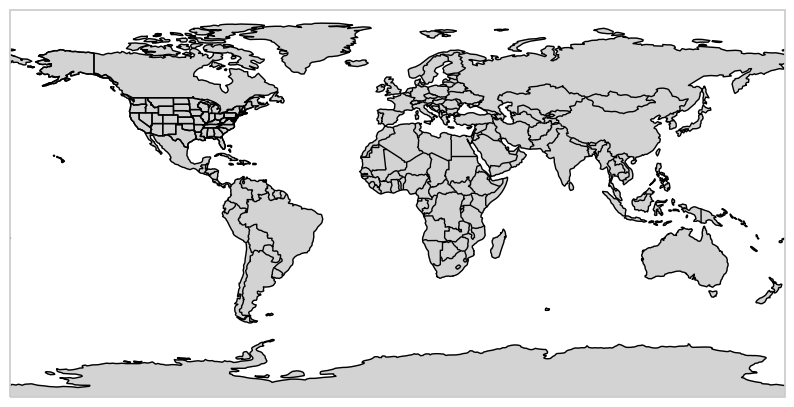

In [188]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.animation import FuncAnimation

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set up map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAND, color='lightgray')

# Retrieve latitude and longitude coordinates from the dataframe
latitudes = covid_reg['lat'].values
longitudes = covid_reg['lon'].values

# Calculate the range of latitudes and longitudes
min_lat, max_lat = latitudes.min(), latitudes.max()
min_lon, max_lon = longitudes.min(), longitudes.max()

# Create a grid for the map
x = np.linspace(min_lon, max_lon, 360)
y = np.linspace(min_lat, max_lat, 180)
X, Y = np.meshgrid(x, y)

def update_plot(index):
    ax.clear()

    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[index]
    year = unique_combinations['year'].iloc[index]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['total_cases'].sum()

    # Create a grid of total cases for each point on the map
    cases_grid = np.zeros_like(X)
    latitudes = filtered_df['lat'].values
    longitudes = filtered_df['lon'].values
    for lat, lon in zip(latitudes, longitudes):
        lat_index = int((lat - min_lat) / (max_lat - min_lat) * 179)
        lon_index = int((lon - min_lon) / (max_lon - min_lon) * 359)
        cases_grid[lat_index, lon_index] = total_cases_sum

    # Plotting the map with total cases data
    ax.imshow(cases_grid, extent=[min_lon, max_lon, min_lat, max_lat], origin='lower', cmap='Reds', vmin=0, vmax=cases_grid.max())

    # Setting plot title
    ax.set_title(f'Total Cases - Year {year}')

animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

# Assign the animation to a variable
anim = animation

# Display the animation
plt.show()



In [ ]:
plot_time_series(covid_reg)

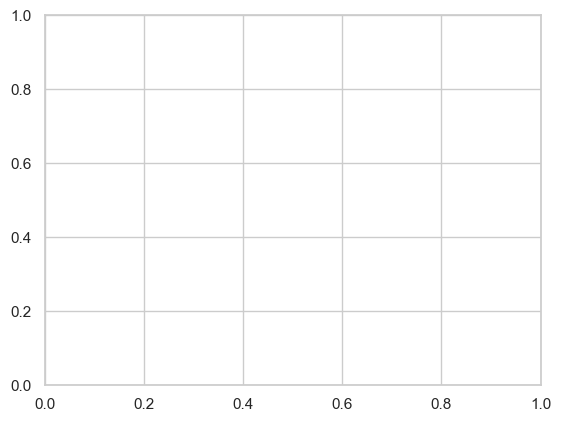

In [147]:
def update_plot(frame):
    ax.clear()
    
    # Get the unique combinations of reg_name and year
    unique_combinations = covid_reg[['reg_name', 'year']].drop_duplicates()

    # Filter data for the specific combination of reg_name and year
    reg_name = unique_combinations['reg_name'].iloc[frame]
    year = unique_combinations['year'].iloc[frame]
    filtered_df = covid_reg[(covid_reg['reg_name'] == reg_name) & (covid_reg['year'] == year)]

    # Calculate total cases sum
    total_cases_sum = filtered_df['total_cases'].sum()

    # Plotting
    plt.bar(reg_name, total_cases_sum)
    plt.xlabel('Region')
    plt.ylabel('Total Cases')
    plt.title(f'Total Cases - Year {year}')
    plt.xticks(rotation=45)

fig, ax = plt.subplots()
animation = FuncAnimation(fig, update_plot, frames=len(covid_reg['year'].unique()), interval=1000)

plt.show()


In [26]:
covid_reg.describe()

,reg_code,lat,lon,total_cases,year,month,week
count,48993.000000,48993.000000,48993.000000,4.899300e+04,48993.000000,48993.000000,48993.0
mean,11.857143,43.046293,12.225955,4.712628e+05,2021.258894,6.338191,25.897128
std,6.273862,2.488806,2.658975,7.323200e+05,0.969680,3.425324,15.0067
min,1.000000,38.115697,7.320149,0.000000e+00,2020.000000,1.000000,1.0
25%,7.000000,41.125596,11.121231,2.679100e+04,2020.000000,3.000000,13.0
50%,12.000000,43.616760,12.388247,1.479040e+05,2021.000000,6.000000,25.0
75%,17.000000,45.434905,13.768136,5.120870e+05,2022.000000,9.000000,39.0
max,22.000000,46.499335,16.867367,4.154840e+06,2023.000000,12.000000,53.0


In [27]:
covid_reg.groupby('reg_name', as_index=False).agg({'total_cases': 'max'})

,reg_name,total_cases
0,Abruzzo,658123
1,Basilicata,200484
2,Calabria,636799
3,Campania,2463300
4,Emilia-Romagna,2151288
5,Friuli Venezia Giulia,579908
6,Lazio,2410793
7,Liguria,666306
8,Lombardia,4154840
9,Marche,717365


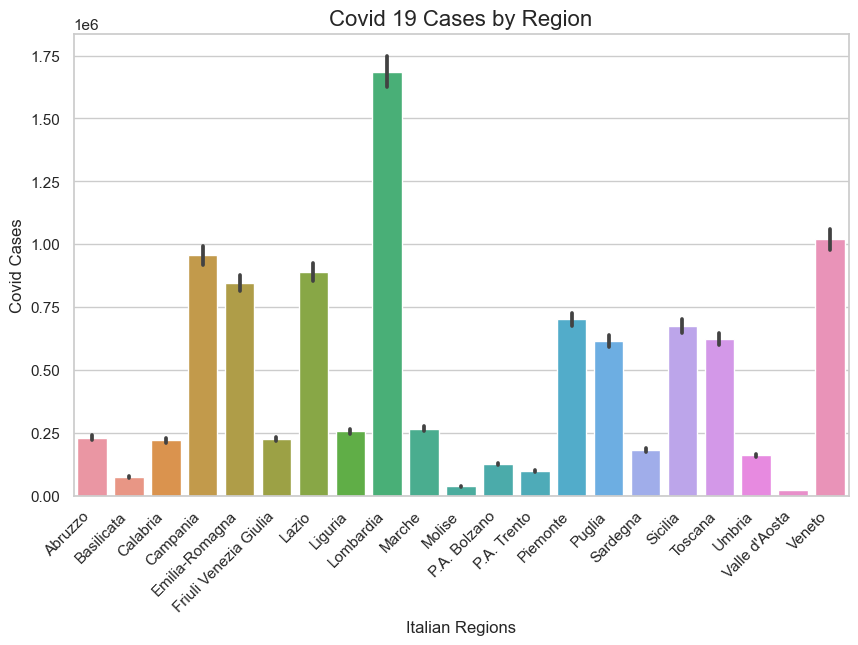

In [30]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='total_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

KeyError: 'total_cases'

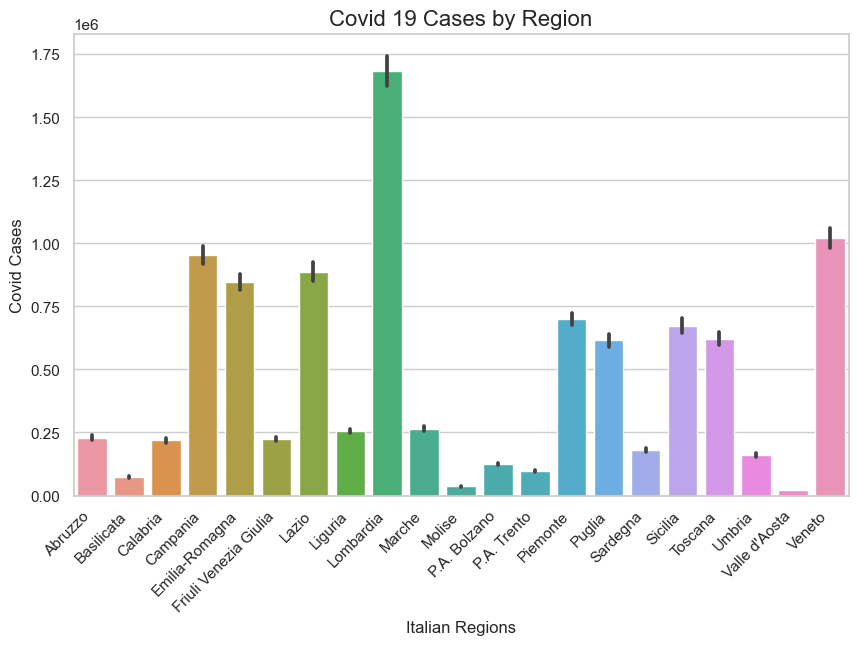

In [31]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=covid_reg, x='reg_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, df['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = df['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [48]:
# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Covid 19 Cases by Region", "Region with Highest Cases"))

# Add the bar chart to the first subplot
fig.add_trace(go.Bar(x=df2['reg_name'], y=df2['total_cases'], name='Covid Cases'), row=1, col=1)
fig.update_xaxes(title_text='Italian Regions', tickangle=-45, row=1, col=1)
fig.update_yaxes(title_text='Covid Cases', tickformat=',.0f', row=1, col=1)

# Find the region with the highest total_cases
region_highest_cases = df2.loc[df2['total_cases'].idxmax(), 'reg_name']

# Add the choropleth map to the second subplot
fig.add_trace(px.choropleth_mapbox(df2, geojson=regions, locations='reg_name', color='total_cases',
                                    color_continuous_scale='Blues', mapbox_style='carto-positron',
                                    hover_name='reg_name', hover_data={'total_cases': ':,'},
                                    title=f'Region with Highest Cases: {region_highest_cases}').data[0], row=1, col=2)

fig.update_layout(height=600, showlegend=False)

fig.show()

ValueError: Trace type 'choroplethmapbox' is not compatible with subplot type 'xy'
at grid position (1, 2)

See the docstring for the specs argument to plotly.subplots.make_subplots
for more information on subplot types

In [49]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            # set labels names
            labels={'reg_name': 'Italian Regions', 'total_cases': 'Covid Cases'})
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [50]:
regions_df.head(1)

,date,state,reg_code,reg_name,lat,long,symptons_hospitalised,in_intensive_care,hospitalised,home_isolation,positive,variance,new_cases,discharged,deaths,suspected,screened,total_cases,swabs,tested_cases,notes,intensive_care_entrances,test_notes,cases_notes,molecular_positive,antigen_positive,molecular_swabs,antigen_swabs,nuts_1_code,nuts_2_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,92,4,96,3323,3419,-47,131,650744,3960,None,None,658123,7483582,1372234,Il dato ''incremento casi confermati'' è compo...,0,None,None,250615,407508,2605598,4877984,ITF,ITF1


In [51]:
df2.head(1)

,reg_name,total_cases
0,Abruzzo,658123


In [52]:
df3 = df2.rename(columns={'reg_name': 'denominazione_regione'})
df3

,denominazione_regione,total_cases
0,Abruzzo,658123
1,Basilicata,200484
2,Calabria,636799
3,Campania,2463300
4,Emilia-Romagna,2151288
5,Friuli Venezia Giulia,579908
6,Lazio,2410793
7,Liguria,666306
8,Lombardia,4154840
9,Marche,717365


In [53]:
# Find the region with the highest total_cases
region_highest_cases = df3.loc[df3['total_cases'].idxmax(), 'denominazione_regione']

# Create the bar chart
fig = px.bar(df3, x='denominazione_regione', y='total_cases', title='Covid 19 Cases by Region',
            labels={'denominazione_regione': 'Italian Regions', 'total_cases': 'Covid Cases'})
fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',.0f')

# Create the choropleth map trace
map_trace = go.Choroplethmapbox(
    geojson=regions,  # Replace with the correct GeoJSON data for Italian regions
    locations=df3['denominazione_regione'],
    z=df3['total_cases'],
    colorscale='Blues',
    zmin=0,
    zmax=df3['total_cases'].max(),
    featureidkey='properties.denominazione_regione',  # Specify the property key in the GeoJSON data
    marker_opacity=0.7,
    hovertemplate='<b>%{location}</b><br>Total Cases: %{z:,.0f}',
    colorbar=dict(title='Covid Cases')
)

# Set the layout for the figure
layout = go.Layout(
    title=f'Region with Highest Cases: {region_highest_cases}',
    mapbox=dict(
        center=dict(lat=42.5, lon=12.5),
        zoom=4.5,
        style='carto-positron'
    ),
    height=500
)

# Create the figure and add the map trace
fig_map = go.Figure(data=map_trace, layout=layout)

# Display the figure
fig_map.show()

In [54]:
# add data, set style, and figure size
fig = px.bar(df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            # Change colors using color_discrete_sequence
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'],
            # set labels names
            labels={'reg_name': 'Italian Regions', 'total_cases': 'Covid Cases'},
            # Change hover text with new list
            hover_data={'total_cases': ':.2f'})

# set marker line width and color
fig.update_traces(marker=dict(line=dict(width=1, color='Gray')))
# set marker angle and opacity
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    )
fig.show()

Text(0.5, 1.0, 'Boxplot of Column Name')

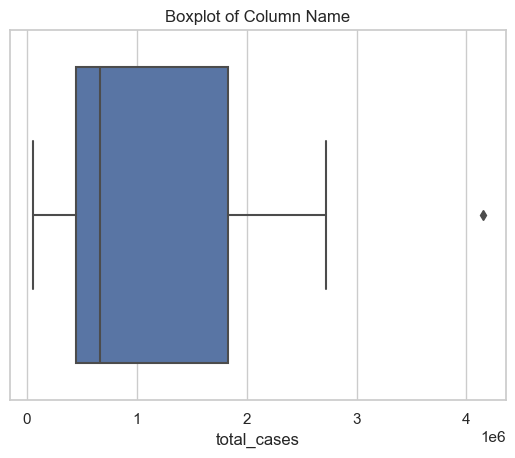

In [55]:
sns.boxplot(data=df2, x='total_cases')
plt.title('Boxplot of Column Name')

#### Convert date column to `datetime` type

In [12]:
regions_df2['date'] = pd.to_datetime(regions_df2['date']).dt.date

Lets create two new columns, **month** and **year**.

In [77]:
regions_df2['year'] = pd.to_datetime(df['date']).dt.year
regions_df2['month'] = pd.to_datetime(df['date']).dt.month
regions_df2

,date,state,reg_code,reg_name,lat,long,total_cases,nuts_1_code,nuts_2_code,year,month
0,2023-05-04,ITA,13,Abruzzo,42.351222,13.398438,658123,ITF,ITF1,2020,2
1,2023-05-04,ITA,17,Basilicata,40.639471,15.805148,200484,ITF,ITF5,2020,2
2,2023-05-04,ITA,18,Calabria,38.905976,16.594402,636799,ITF,ITF6,2020,2
3,2023-05-04,ITA,15,Campania,40.839566,14.250850,2463300,ITF,ITF3,2020,2
4,2023-05-04,ITA,8,Emilia-Romagna,44.494367,11.341721,2151288,ITH,ITH5,2020,2
5,2023-05-04,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,579908,ITH,ITH4,2020,2
6,2023-05-04,ITA,12,Lazio,41.892770,12.483667,2410793,ITI,ITI4,2020,2
7,2023-05-04,ITA,7,Liguria,44.411493,8.932699,666306,ITC,ITC3,2020,2
8,2023-05-04,ITA,3,Lombardia,45.466794,9.190347,4154840,ITC,ITC4,2020,2
9,2023-05-04,ITA,11,Marche,43.616760,13.518875,717365,ITI,ITI3,2020,2


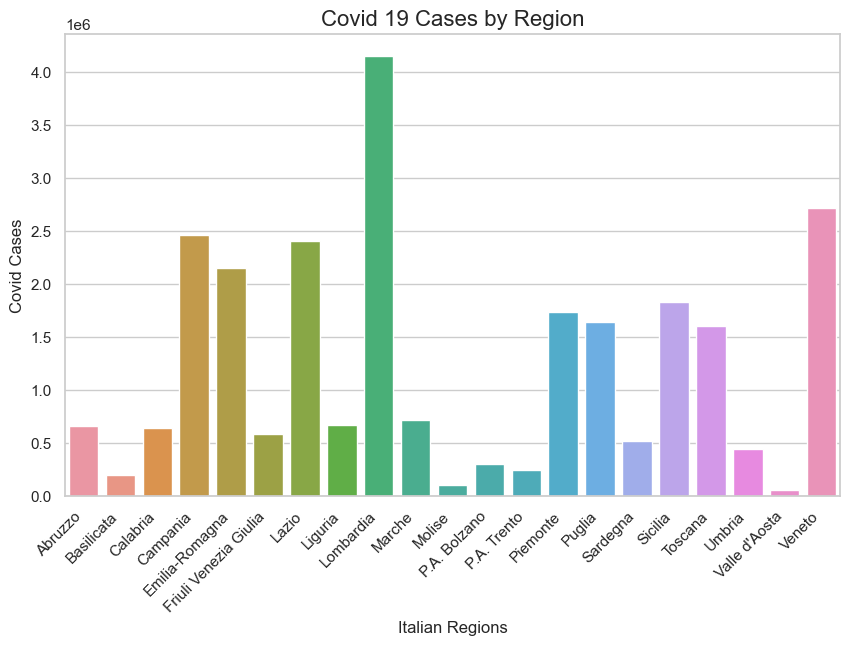

In [13]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='total_cases', ax=ax) # Change colors using palette - 'palette='crest''
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

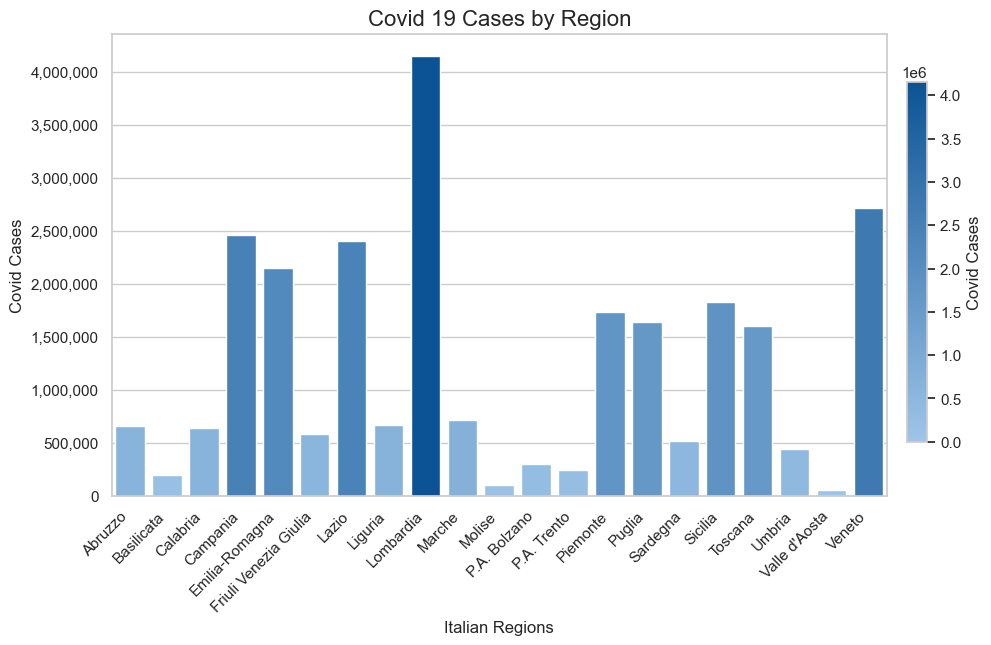

In [14]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=regions_df2, x='reg_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, regions_df2['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = regions_df2['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [15]:
fig = px.bar(regions_df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [16]:
import plotly.express as px

fig = px.bar(regions_df2, x='reg_name', y='total_cases', title='Covid 19 Cases by Region',
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'},
            hover_data={'total_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, regions_df2['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

Text(0.5, 1.0, 'Boxplot of Column Name')

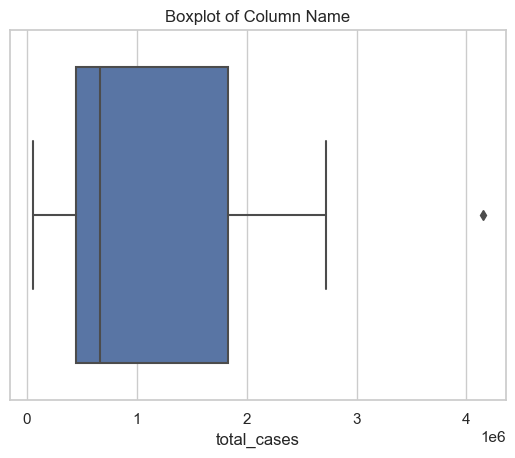

In [17]:
sns.boxplot(data=regions_df2, x='total_cases')
plt.title('Boxplot of Column Name')

Lets take a look at the **Province** data.

In [19]:
with open('../../data/Covid/dpc-covid19-ita-province-latest.json') as response:
    provinces = json.load(response)

provinces

[{'data': '2023-05-04T17:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 66,
  'denominazione_provincia': "L'Aquila",
  'sigla_provincia': 'AQ',
  'lat': 42.35122196,
  'long': 13.39843823,
  'totale_casi': 133740,
  'note': '',
  'codice_nuts_1': 'ITF',
  'codice_nuts_2': 'ITF1',
  'codice_nuts_3': 'ITF11'},
 {'data': '2023-05-04T17:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 67,
  'denominazione_provincia': 'Teramo',
  'sigla_provincia': 'TE',
  'lat': 42.6589177,
  'long': 13.70439971,
  'totale_casi': 156008,
  'note': '',
  'codice_nuts_1': 'ITF',
  'codice_nuts_2': 'ITF1',
  'codice_nuts_3': 'ITF12'},
 {'data': '2023-05-04T17:00:00',
  'stato': 'ITA',
  'codice_regione': 13,
  'denominazione_regione': 'Abruzzo',
  'codice_provincia': 68,
  'denominazione_provincia': 'Pescara',
  'sigla_provincia': 'PE',
  'lat': 42.46458398,
  'long': 14.21364822,
  'tot

Create a dataframe from the `json` file.

In [20]:
provs_df = pd.DataFrame(provinces)

In [21]:
provs_df.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2023-05-04T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,133740,,ITF,ITF1,ITF11
1,2023-05-04T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,156008,,ITF,ITF1,ITF12
2,2023-05-04T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,157318,,ITF,ITF1,ITF13
3,2023-05-04T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,189377,,ITF,ITF1,ITF14
4,2023-05-04T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,,NaN,NaN,13402,,ITF,ITF1,None


Translate the column names to English.

In [22]:
provs_df = provs_df.rename(columns={
    'data': 'date', 'stato': 'state', 'codice_regione': 'reg_code', 'denominazione_regione': 'reg_name',
    'codice_provincia': 'prov_code', 'denominazione_provincia': 'prov_name', 'sigla_provincia': 'prov_abr',
    'totale_casi': 'total_cases', 'note': 'notes', 'codice_nuts_1': 'nuts_1_code',
    'codice_nuts_2': 'nuts_2_code', 'codice_nuts_3': 'nuts_3_code'
    })
provs_df.head()

,date,state,reg_code,reg_name,prov_code,prov_name,prov_abr,lat,long,total_cases,notes,nuts_1_code,nuts_2_code,nuts_3_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,133740,,ITF,ITF1,ITF11
1,2023-05-04T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,156008,,ITF,ITF1,ITF12
2,2023-05-04T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,157318,,ITF,ITF1,ITF13
3,2023-05-04T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,189377,,ITF,ITF1,ITF14
4,2023-05-04T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,,NaN,NaN,13402,,ITF,ITF1,None


Create a new dataframe with only the column names required:  
  
- date
- state
- region_code
- province_code
- province
- lat
- lon
- total_cases
- nuts_1_code
- nuts_2_code
- nuts_3_code

In [23]:
provs_df2 = provs_df.drop(columns=[
    'prov_abr', 'notes',
    ])
provs_df2.head()

,date,state,reg_code,reg_name,prov_code,prov_name,lat,long,total_cases,nuts_1_code,nuts_2_code,nuts_3_code
0,2023-05-04T17:00:00,ITA,13,Abruzzo,66,L'Aquila,42.351222,13.398438,133740,ITF,ITF1,ITF11
1,2023-05-04T17:00:00,ITA,13,Abruzzo,67,Teramo,42.658918,13.704400,156008,ITF,ITF1,ITF12
2,2023-05-04T17:00:00,ITA,13,Abruzzo,68,Pescara,42.464584,14.213648,157318,ITF,ITF1,ITF13
3,2023-05-04T17:00:00,ITA,13,Abruzzo,69,Chieti,42.351032,14.167546,189377,ITF,ITF1,ITF14
4,2023-05-04T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,13402,ITF,ITF1,None


In [75]:
provs_covid = provs_df2.drop_duplicates(subset=['prov_code','prov_name'])
provs_covid.to_csv('../../data/Covid/covid-provinces.csv', index=False)

In [24]:
provs_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         149 non-null    object 
 1   state        149 non-null    object 
 2   reg_code     149 non-null    int64  
 3   reg_name     149 non-null    object 
 4   prov_code    149 non-null    int64  
 5   prov_name    149 non-null    object 
 6   lat          107 non-null    float64
 7   long         107 non-null    float64
 8   total_cases  149 non-null    int64  
 9   nuts_1_code  149 non-null    object 
 10  nuts_2_code  149 non-null    object 
 11  nuts_3_code  107 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 14.1+ KB


In [25]:
provs_df2.describe()

,reg_code,prov_code,lat,long,total_cases
count,149.000000,149.000000,107.000000,107.000000,1.490000e+02
mean,10.147651,303.570470,42.908522,12.096599,1.732162e+05
std,5.917651,401.224919,2.643893,2.673067,2.414069e+05
min,1.000000,1.000000,36.925092,7.320149,0.000000e+00
25%,5.000000,38.000000,40.994353,9.849832,2.622700e+04
50%,9.000000,75.000000,43.715532,12.104734,1.145640e+05
75%,15.000000,883.000000,45.171180,14.114698,2.101900e+05
max,20.000000,999.000000,46.499335,18.171897,1.777218e+06


In [26]:
provs_df2['date'] = pd.to_datetime(provs_df2['date']).dt.date

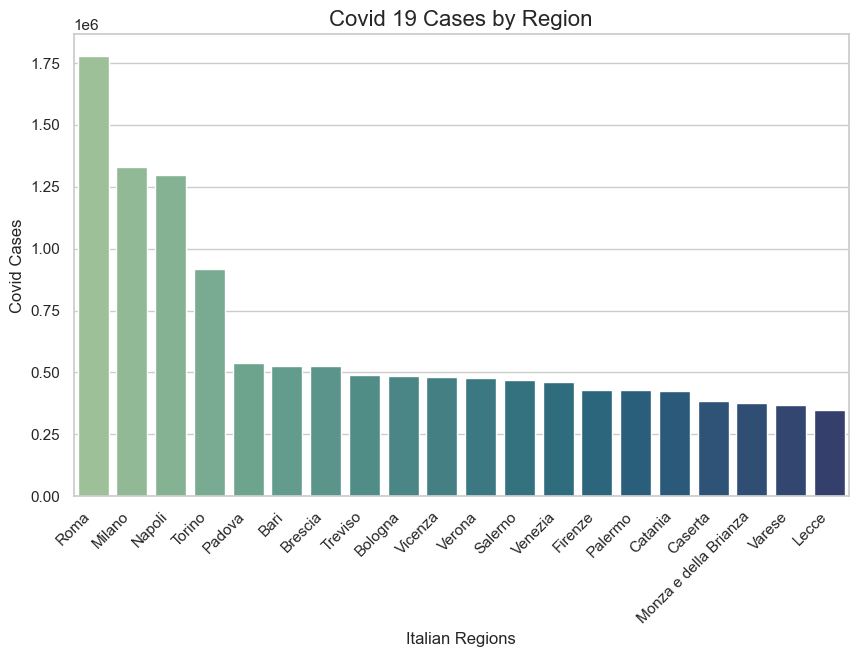

In [27]:
# set style and figure size
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# select top 20 provinces by total cases and plot bar chart with updated color palette
top_provs = provs_df2.nlargest(20, 'total_cases')
sns.barplot(data=top_provs, x='prov_name', y='total_cases', ax=ax, palette='crest')

# set title and axis labels
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

plt.show()

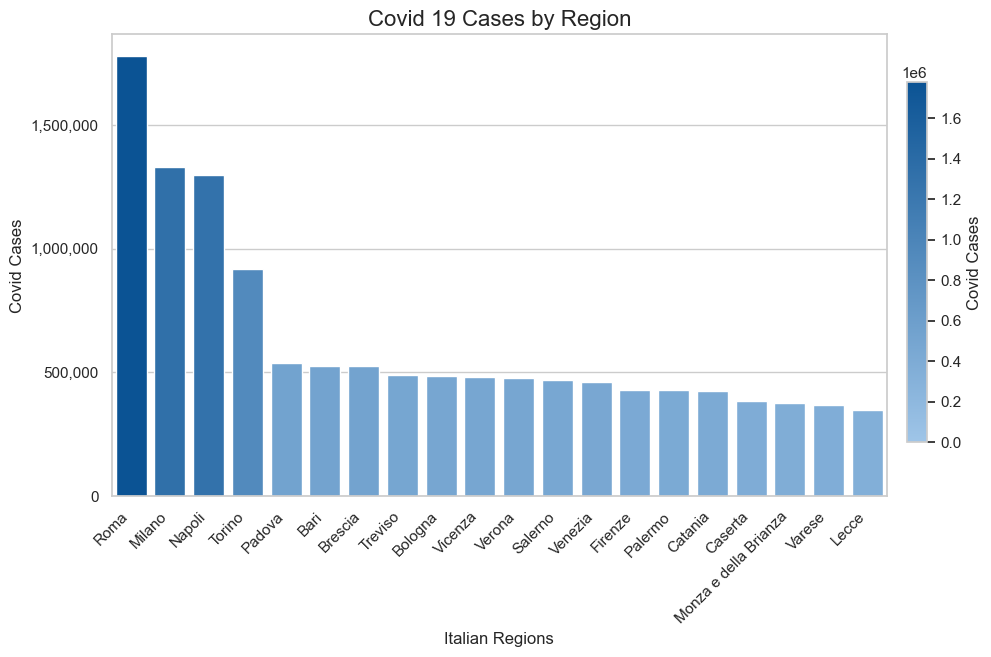

In [28]:
# set style and figure size
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

# plot bar chart and set title and axis labels
sns.barplot(data=top_provs, x='prov_name', y='total_cases', ax=ax)
plt.title('Covid 19 Cases by Region', fontsize=16)
ax.set_xlabel('Italian Regions')
ax.set_ylabel('Covid Cases')
plt.xticks(rotation=45, ha='right') # ha = horizontal alignment

# add labels to each bar
y_ticks = np.arange(0, top_provs['total_cases'].max()+1, 500000)
ax.set_yticks(y_ticks)
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_ticks])

# set color of each bar based on its height
max_cases = top_provs['total_cases'].max()
start_color = '#9FC5E8' # light shade of blue
end_color = '#0B5394' # dark shade of blue
color_map = colors.LinearSegmentedColormap.from_list('custom', [start_color, end_color], N=max_cases)

# loop through each bar
for patch in ax.patches:
    value = patch.get_height()
    # set color based on the normalized height (between 0 and 1)
    color = color_map(value / max_cases)
    patch.set_facecolor(color)

# add color bar
cbar_ax = fig.add_axes([0.92, 0.2, 0.02, 0.6])
cbar = fig.colorbar(cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=max_cases), cmap=color_map), cax=cbar_ax)
cbar.set_label('Covid Cases')

plt.show()

In [29]:
fig = px.bar(top_provs, x='prov_name', y='total_cases', title='Covid 19 Cases by Region',
            labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'}) # set labels
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

In [30]:
import plotly.express as px

fig = px.bar(top_provs, x='prov_name', y='total_cases', title='Covid 19 Cases by Region',
            color='total_cases', color_continuous_scale=['#9FC5E8', '#0b5394'], labels={'region': 'Italian Regions', 'total_cases': 'Covid Cases'},
            hover_data={'total_cases': ':.2f'}) # set labels and hover data

fig.update_traces(marker=dict(line=dict(width=1, color='Gray'))) # set marker line width and color
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_tickformat=',.0f',
    yaxis_range=[0, top_provs['total_cases'].max()+500000]
    ) # set x-axis tick angle and y-axis tick format
fig.show()

Text(0.5, 1.0, 'Boxplot of Column Name')

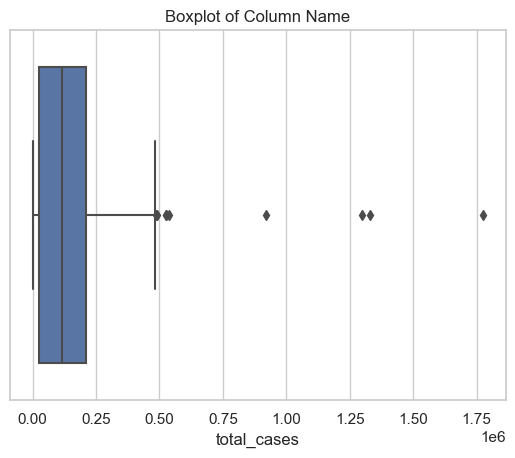

In [31]:
sns.boxplot(data=provs_df2, x='total_cases')
plt.title('Boxplot of Column Name')